> <h1><b>TABLE OF CONTENTS</b></h1>
<ul>
    <a href='#1'><li>Data Overview</li></a>
</ul>
<ul>
    <a href='#2'><li>Visualization</li></a>
        <ul>
             <a href='#3'><li>Bar Plot</li></a>
             <a href='#4'><li>Joint Plot</li></a>
             <a href='#5'><li>Lm Plot</li></a>
             <a href='#6'><li>KDE Plot</li></a>
             <a href='#7'><li>Violin Plot</li></a>
             <a href='#8'><li>Heatmap</li></a>
             <a href='#9'><li>Pair Plot</li></a>
             <a href='#10'><li>Missing No</li></a>
             <a href='#11'><li>Parallel Plots</li></a>
             <a href='#12'><li>Venn Plot</li></a>
             <a href='#13'><li>Donut</li></a>
             <a href='#14'><li>Cluster Map</li></a>
             <a href='#15'><li>Basic 3D Scatter Plot</li></a>
             <a href='#16'><li>Line Charts</li></a>
             <a href='#17'><li>Scatter Plot</li></a>
             <a href='#18'><li>Bar Charts</li></a>
             <a href='#19'><li>Bubble Charts</li></a>
        </ul>
</ul>
<ul>
    <a href='#20'><li>Conclusion</li></a>
    <a href='#21'><li>References</li></a>
</ul>

<p id='1'><h2><b>Data Overview</b></h2></p>
Happiness rank and scores by country.

* Columns that the dataset contains : 

    <b>Country</b>: Name of the country.  
    <b>Region</b>: Region the country belongs to.  
    <b>Happiness Rank</b>: Rank of the country based on the Happiness Score.  
<b>Happiness Score</b>: A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."  
<b>Standard Error</b>: The standard error of the happiness score.  
<b>Economy (GDP per Capita)</b>: The extent to which GDP contributes to the calculation of the Happiness Score.  
<b>Family</b>: The extent to which Family contributes to the calculation of the Happiness Score  
<b>Health (Life Expectancy)</b>: The extent to which Life expectancy contributed to the calculation of the Happiness Score  
<b>Freedom</b>: The extent to which Freedom contributed to the calculation of the Happiness Score.  
<b>Trust (Government Corruption)</b>: The extent to which Perception of Corruption contributes to Happiness Score.  
<b>Generosity</b>: The extent to which Generosity contributed to the calculation of the Happiness Score.  
<b>Dystopia Residual</b>: The extent to which Dystopia Residual contributed to the calculation of the Happiness Score.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import warnings 
warnings.filterwarnings("ignore")

import os
print(os.listdir("../input"))

['2017.csv', '2016.csv', '2015.csv']


In [2]:
whr = pd.read_csv("../input/2017.csv")
whr2015 = pd.read_csv("../input/2015.csv")
whr2016 = pd.read_csv("../input/2016.csv")
whr2017 = pd.read_csv("../input/2017.csv")

In [3]:
whr.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [4]:
whr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.6+ KB


<p id='2'><h2><b>Visualization</b></h2></p>

<p id='3'><h3><b>Bar Plot</b></h3></p>

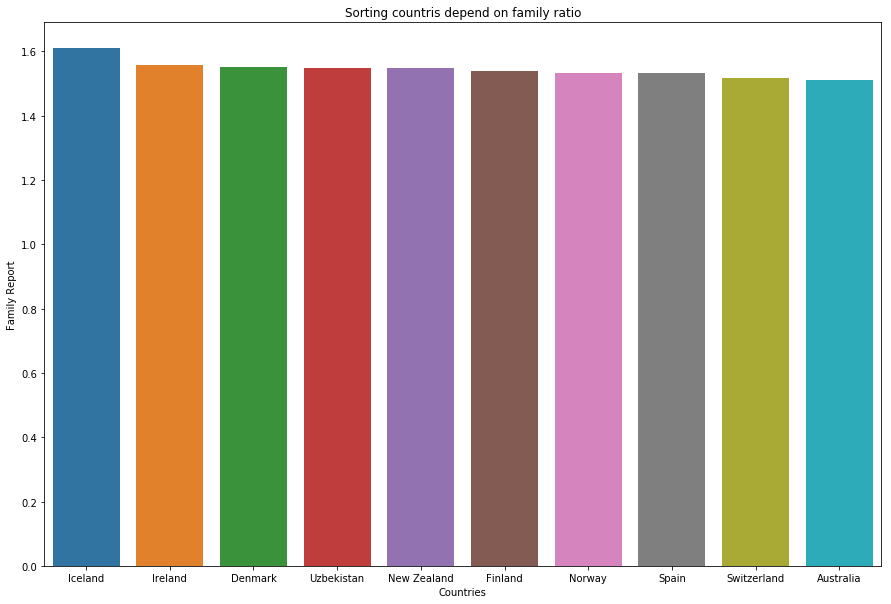

In [5]:
country = list(whr['Country'].unique())
whr.drop(["Freedom","Generosity","Trust..Government.Corruption."],axis=1)
family_ratio = []
for i in country:
    x = whr[whr['Country']==i]
    Family = sum(x.Family)/len(x)
    family_ratio.append(Family)
data = pd.DataFrame({'country': country,'family_report':family_ratio})
new_index = (data['family_report'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)
    
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data["country"][0:10],y=sorted_data["family_report"][0:10])
plt.xlabel("Countries")
plt.ylabel("Family Report")
plt.title("Sorting countris depend on family ratio")
plt.show()

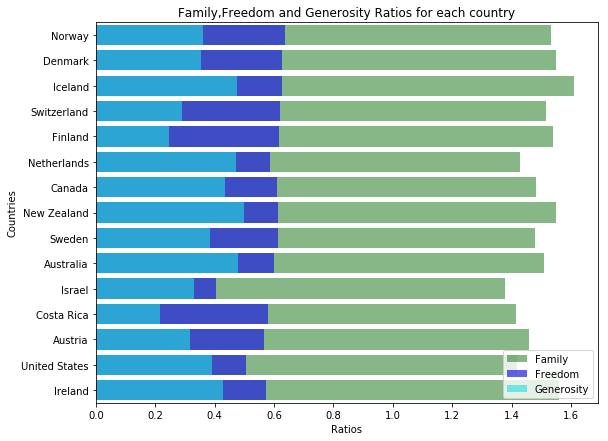

In [6]:
country = list(whr['Country'].unique())
family = []
freedom = []
generosity = []
for i in country:
    x = whr[whr['Country']==i]
    family.append(sum(x.Family)/len(x))
    freedom.append(sum(x.Freedom) / len(x))
    generosity.append(sum(x.Generosity) / len(x))
    
f,ax = plt.subplots(figsize = (9,7))
sns.barplot(x=family[0:15],y=country[0:15],color='green',alpha = 0.5,label='Family' )
sns.barplot(x=freedom[0:15],y=country[0:15],color='blue',alpha = 0.7,label='Freedom')
sns.barplot(x=generosity[0:15],y=country[0:15],color='cyan',alpha = 0.6,label='Generosity')

ax.legend(loc='lower right',frameon = True)     # legendlarin gorunurlugu
ax.set(xlabel="Ratios", ylabel='Countries',title = "Family,Freedom and Generosity Ratios for each country")
plt.show()

<p id='4'><h3><b>Joint Plot</b></h3></p>

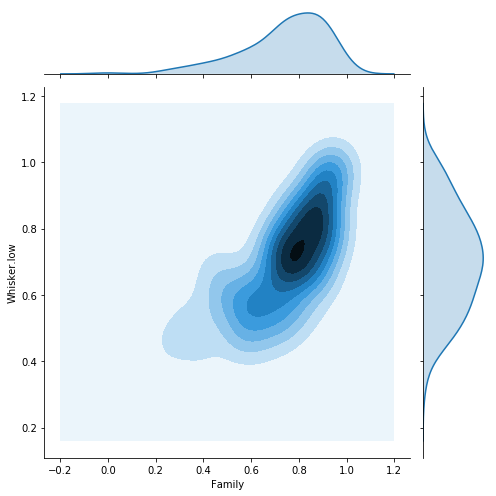

In [7]:
whsker = whr["Whisker.low"]/max(whr["Whisker.low"])
fmly = whr["Family"]/max(whr["Family"])
g = sns.jointplot(fmly,whsker,kind="kde",height=7)
plt.savefig("graph.png")
plt.show()

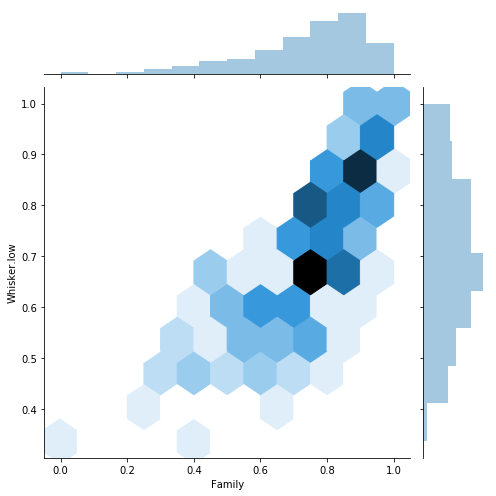

In [8]:
whsker = whr["Whisker.low"]/max(whr["Whisker.low"])
fmly = whr["Family"]/max(whr["Family"])
g = sns.jointplot(fmly,whsker,kind="hex",height=7)
plt.savefig("graph.png")
plt.show()

<p id='5'><h3><b>Lm Plot</b></h3></p>

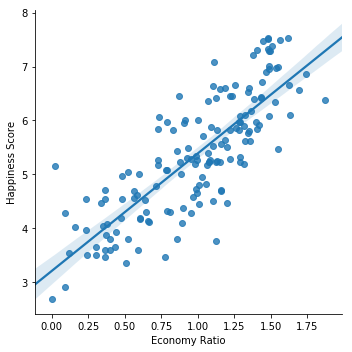

In [10]:
sns.lmplot(x="Economy..GDP.per.Capita.",y="Happiness.Score",data=whr)
plt.xlabel("Economy Ratio")
plt.ylabel("Happiness Score")
plt.show()

<p id='6'><h3><b>KDE Plot</b></h3></p>

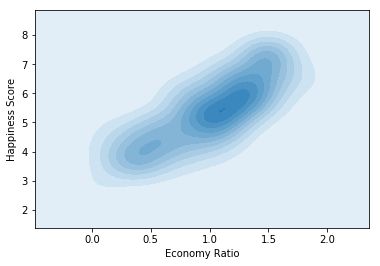

In [11]:
sns.kdeplot(whr["Economy..GDP.per.Capita."],whr["Happiness.Score"],shade= True,cut=3)
plt.xlabel("Economy Ratio")
plt.ylabel("Happiness Score")
plt.show()

<p id='7'><h3><b>Violin Plot</b></h3></p>

In [12]:
family = whr.Family
freedom = whr.Freedom
new_data = pd.DataFrame({'family': family,'freedom':freedom})
new_data.head()

,family,freedom
0,1.533524,0.635423
1,1.551122,0.626007
2,1.610574,0.627163
3,1.516912,0.620071
4,1.540247,0.617951


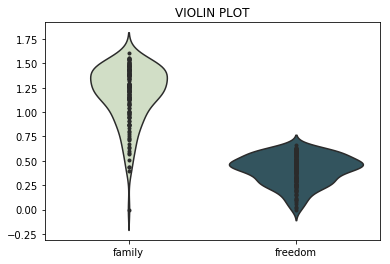

In [13]:
pal = sns.cubehelix_palette(2, rot=-.5, dark=.3)
sns.violinplot(data=new_data, palette=pal, inner="points")
plt.title("VIOLIN PLOT")
plt.show()

<p id='8'><h3><b>Heatmap</b></h3></p>

Correlation.

In [14]:
whr.corr()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
Happiness.Rank,1.000000,-0.992774,-0.993058,-0.991533,-0.813244,-0.736753,-0.780716,-0.551608,-0.132620,-0.405842,-0.484506
Happiness.Score,-0.992774,1.000000,0.999497,0.999520,0.812469,0.752737,0.781951,0.570137,0.155256,0.429080,0.475355
Whisker.high,-0.993058,0.999497,1.000000,0.998036,0.811868,0.750934,0.776634,0.569907,0.155462,0.426459,0.478824
Whisker.low,-0.991533,0.999520,0.998036,1.000000,0.812267,0.753767,0.786385,0.569808,0.154904,0.431223,0.471505
Economy..GDP.per.Capita.,-0.813244,0.812469,0.811868,0.812267,1.000000,0.688296,0.843077,0.369873,-0.019011,0.350944,0.024226
Family,-0.736753,0.752737,0.750934,0.753767,0.688296,1.000000,0.612080,0.424966,0.051693,0.231841,0.070506
Health..Life.Expectancy.,-0.780716,0.781951,0.776634,0.786385,0.843077,0.612080,1.000000,0.349827,0.063191,0.279752,0.054963
Freedom,-0.551608,0.570137,0.569907,0.569808,0.369873,0.424966,0.349827,1.000000,0.316083,0.499183,0.081926
Generosity,-0.132620,0.155256,0.155462,0.154904,-0.019011,0.051693,0.063191,0.316083,1.000000,0.294159,-0.116627
Trust..Government.Corruption.,-0.405842,0.429080,0.426459,0.431223,0.350944,0.231841,0.279752,0.499183,0.294159,1.000000,-0.022755


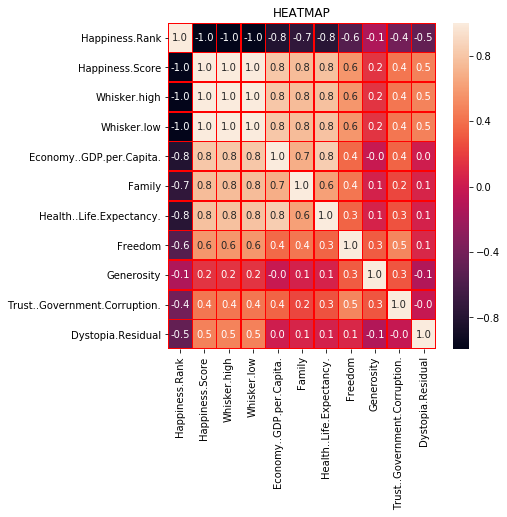

In [15]:
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(whr.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.title("HEATMAP")
plt.show()

<p id='9'><h3><b>Pair Plot</b></h3></p>

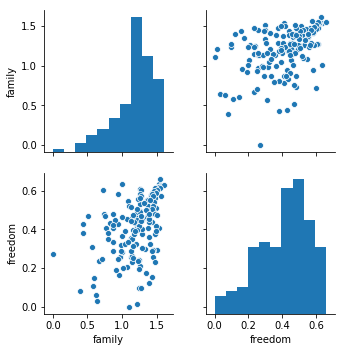

In [16]:
sns.pairplot(new_data)
plt.show()

<p id='10'><h3><b>Missing No</b></h3></p>

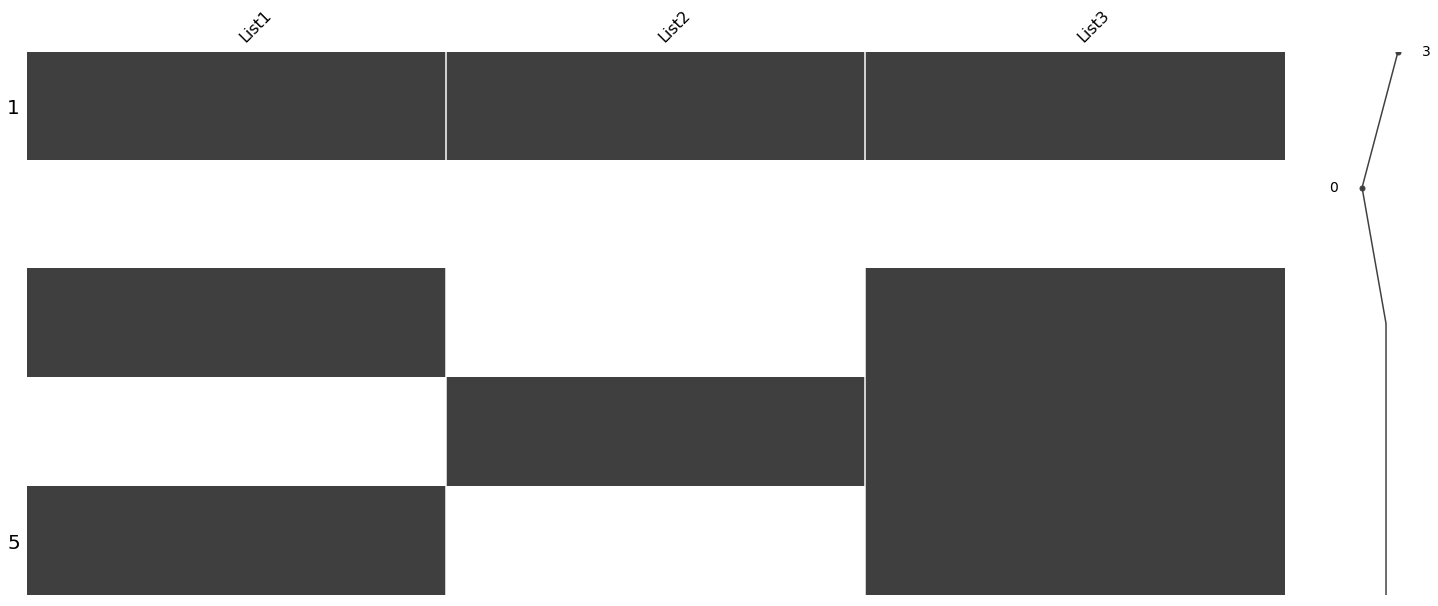

In [17]:
dictionary = {"List1":[1,np.nan,3,np.nan,5],
             "List2":[1,np.nan,np.nan,3,np.nan],
             "List3":[1,np.nan,3,4,5]}
data_msno = pd.DataFrame(dictionary)

import missingno as msno
msno.matrix(data_msno)
plt.show()

<p id='11'><h3><b>Parallel Plots</b></h3></p>

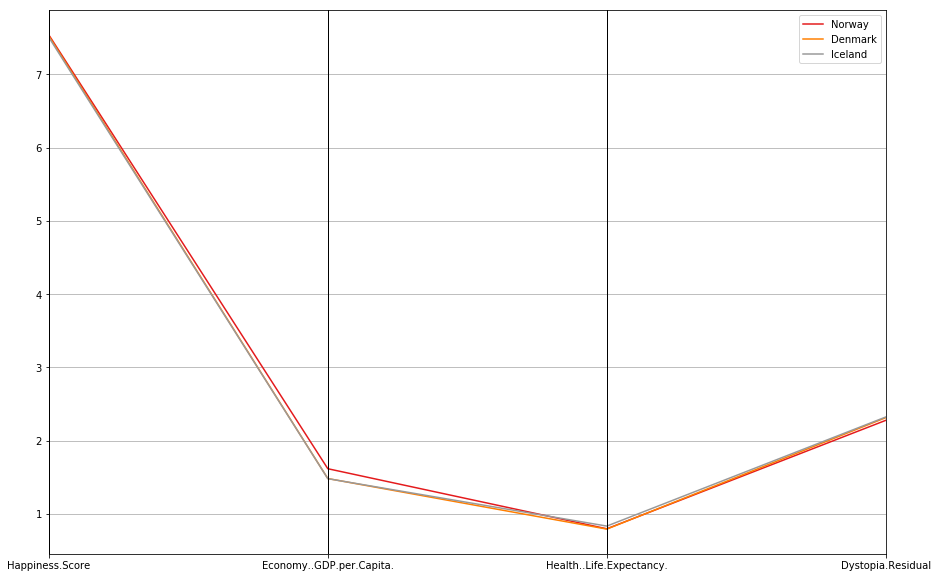

In [18]:
from pandas.tools.plotting import parallel_coordinates

dropped_whr = whr.drop(["Generosity","Family","Freedom","Happiness.Rank","Whisker.high","Whisker.low","Trust..Government.Corruption."],axis=1)
plt.figure(figsize=(15,10))
parallel_coordinates(dropped_whr[0:3], 'Country', colormap=plt.get_cmap("Set1"))
plt.savefig('graph.png')
plt.show()

<p id='12'><h3><b>Venn Plot</b></h3></p>

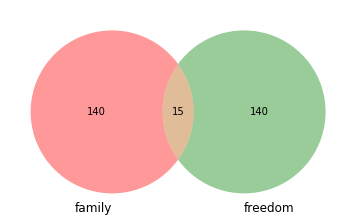

In [19]:
family = whr.Family
freedom = whr.Freedom
generosity = whr.Generosity

from matplotlib_venn import venn2
family = data.iloc[:,0]
freedom = data.iloc[:,1]
# First way to call the 2 group Venn diagram
venn2(subsets = (len(family)-15, len(freedom)-15, 15), set_labels = ('family', 'freedom'))
plt.show()

<p id='13'><h3><b>Donut</b></h3></p>

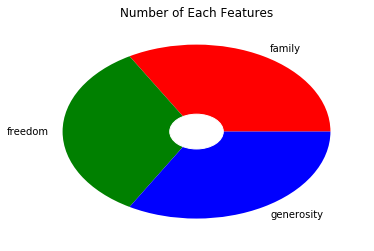

In [20]:
family = whr.Family
freedom = whr.Freedom
generosity = whr.Generosity
#
feature_names = "family","freedom","generosity"
feature_size = [len(family),len(freedom),len(generosity)]
#
circle = plt.Circle((0,0),0.2,color = "white")
plt.pie(feature_size, labels = feature_names, colors = ["red","green","blue","cyan"] )
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Number of Each Features")
plt.show()

<p id='14'><h3><b>Cluster Map</b></h3></p>

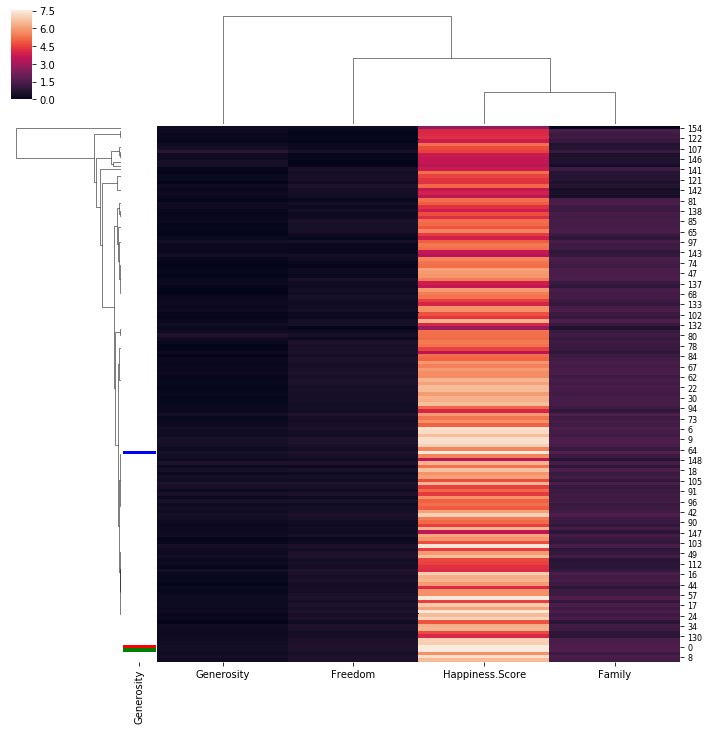

In [21]:
df = whr.loc[:,["Happiness.Score","Generosity","Family","Freedom"]]
df1 = whr.Generosity
x = dict(zip(df1.unique(),"rgb"))
row_colors = df1.map(x)
cg = sns.clustermap(df,row_colors=row_colors,figsize=(12, 12),metric="correlation")
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(),rotation = 0,size =8)
plt.show()

<p id='15'><h3><b>Basic 3D Scatter Plot</b></h3></p>

In [22]:
data = pd.read_csv('../input/2017.csv')

Norway = data[data.Country == "Norway"]

Iceland = data[data.Country == "Iceland"]

trace1 = go.Scatter3d(
    x=Norway.Family,
    y=Norway.Freedom,
    z=Norway.Generosity,
    mode='markers',
    name = "Norway",
    marker=dict(
        color='rgb(217, 100, 100)',
        size=12,
        line=dict(
            color='rgb(255, 255, 255)',
            width=0.1
        )
    )
)
trace2 = go.Scatter3d(
    x=Iceland.Family,
    y=Iceland.Freedom,
    z=Iceland.Generosity,
    mode='markers',
    name = "Iceland",
    marker=dict(
        color='rgb(54, 170, 127)',
        size=12,
        line=dict(
            color='rgb(204, 204, 204)',
            width=0.1
        )
    )
    
)
data = [trace1, trace2]
layout = go.Layout(
    title = ' 3D iris_setosa and iris_virginica',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

<p id='16'><h3><b>Line Charts</b></h3></p>

In [23]:
df = whr.iloc[:100,:]

import plotly.graph_objs as go

trace1 = go.Scatter(
                    x = df["Happiness.Rank"],
                    y = df["Happiness.Score"],
                    mode = "lines",
                    name = "Happiness Score",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= df.Country)
trace2 = go.Scatter(
                    x = df["Happiness.Rank"],
                    y = df["Economy..GDP.per.Capita."],
                    mode = "lines+markers",
                    name = "Economy",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= df.Country)
data = [trace1, trace2]
layout = dict(title = "Top 100 Happiest Country's Happiness and Economy Scores",
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

<p id='17'><h3><b>Scatter Plot</b></h3></p>

In [24]:
whr2015 = whr2015[:20]
whr2016 = whr2016[:20]
whr2017 = whr2017[:20]

import plotly.graph_objs as go
trace1 =go.Scatter(
                    x = whr2015["Happiness Rank"],
                    y = whr2015["Happiness Score"],
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'rgba(255, 128, 255, 1)'),
                    text= whr2015.Country)
trace2 =go.Scatter(
                    x = whr2016["Happiness Rank"],
                    y = whr2016["Happiness Score"],
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'rgba(255, 128, 2, 1)'),
                    text= whr2016.Country)
trace3 =go.Scatter(
                    x = whr2017["Happiness.Rank"],
                    y = whr2017["Happiness.Score"],
                    mode = "markers",
                    name = "2017",
                    marker = dict(color = 'rgba(0, 255, 200, 1)'),
                    text= whr2017.Country)
data = [trace1, trace2, trace3]
layout = dict(title = 'Happiness Score vs Happiness Rank of top 100 Countries with 2014, 2015 and 2016 years',
              xaxis= dict(title= 'Happiness Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Happiness Score',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

<p id='18'><h3><b>Bar Charts</b></h3></p>

In [25]:
import plotly.graph_objs as go

trace1 = go.Bar(
                x = whr2015[:3].Country,
                y = whr2015[:3]["Happiness Score"],
                name = "Happiness Score",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = whr2015[:3].Country)
trace2 = go.Bar(
                x = whr2015[:3].Country,
                y = whr2015[:3]["Family"],
                name = "Family",
                marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = whr2015[:3].Country)
data = [trace1, trace2]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [26]:
import plotly.graph_objs as go

x = whr2015[:3].Country

trace1 = {
  'x': x,
  'y': whr2015[:3]["Happiness Score"],
  'name': 'Happiness Score',
  'type': 'bar'
};
trace2 = {
  'x': x,
  'y': whr2015[:3]["Family"],
  'name': 'Family',
  'type': 'bar'
};
data = [trace1, trace2];
layout = {
  'xaxis': {'title': 'Top 3 Countries'},
  'barmode': 'relative',
  'title': 'Happiness and Family of top 3 countries in 2015'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [27]:
import plotly.graph_objs as go
from plotly import tools
import matplotlib.pyplot as plt

y_saving = [each for each in whr2017["Generosity"][:5]]
y_net_worth  = [float(each) for each in whr2017["Happiness.Score"][:5]]
x_saving = [each for each in whr2017.Country[:5]]
x_net_worth  = [each for each in whr2017.Country[:5]]
trace0 = go.Bar(
                x=y_saving,
                y=x_saving,
                marker=dict(color='rgba(171, 50, 96, 0.6)',line=dict(color='rgba(171, 50, 96, 1.0)',width=1)),
                name='Generosity',
                orientation='h',
)
trace1 = go.Scatter(
                x=y_net_worth,
                y=x_net_worth,
                mode='lines+markers',
                line=dict(color='rgb(63, 72, 204)'),
                name='Happiness',
)
layout = dict(
                title='Generosity and Happiness',
                yaxis=dict(showticklabels=True,domain=[0, 0.85]),
                yaxis2=dict(showline=True,showticklabels=False,linecolor='rgba(102, 102, 102, 0.8)',linewidth=2,domain=[0, 0.85]),
                xaxis=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0, 0.42]),
                xaxis2=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0.47, 1],side='top',dtick=25),
                legend=dict(x=0.029,y=1.038,font=dict(size=10) ),
                margin=dict(l=200, r=20,t=70,b=70),
                paper_bgcolor='rgb(248, 248, 255)',
                plot_bgcolor='rgb(248, 248, 255)',
)
annotations = []
y_s = np.round(y_saving, decimals=2)
y_nw = np.rint(y_net_worth)
# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, x_saving):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2', y=xd, x=ydn - 4,text='{:,}'.format(ydn),font=dict(family='Arial', size=12,color='rgb(63, 72, 204)'),showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1', y=xd, x=yd + 3,text=str(yd),font=dict(family='Arial', size=12,color='rgb(171, 50, 96)'),showarrow=False))

layout['annotations'] = annotations

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                          shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(layout)
iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



<p id='19'><h3><b>Bubble Charts</b></h3></p>

In [28]:
data = [
    {
        'y': whr2017["Generosity"][:10],
        'x': whr2017["Happiness.Rank"][:10],
        'mode': 'markers',
        'marker': {
            'color': whr2017["Happiness.Score"],
            'size': whr2017["Happiness.Score"],
            'showscale': True
        },
        "text" :  whr2017["Country"][:10]    
    }
]

iplot(data)

<p id='20'><h2><b>Conclusion</b></h2></p>
* In this kernel we used lots of visualization tools.
* We have learned how to use them.
* If you like, please upvote!

<p id='21'><h2><b>Reference</b></h2></p>

https://www.kaggle.com/kanncaa1/plotly-tutorial-for-beginners